In [1]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import sqlite3 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, mannwhitneyu
from bootcampviztools import *

# Configurar Pandas para mostrar todas las columnas y filas porque Games es un conjunto de datos muy grande
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
#Importar los datos
df_games = pd.read_csv("./data/games.grivg.csv")
df_char = pd.read_csv("./data/characters.grivg.csv")
df_sex = pd.read_csv("./data/sexualization.grivg.csv")

In [3]:
#Exploratorio incial y creacion de copias
df_juegos = df_games.copy()
df_juegos.head()

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,PEGI,Customizable_main,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Percentage_non_male,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews,Unnamed: 27
0,GTAV,Grand Theft Auto V,Nov-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,18,No,3,0,9,2,18%,MS,M,7,0,0%,9.7,9.0,10.0,9.0,9.4,NaN
1,PSS,Pokémon Sword/Shield,Nov-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,7,Yes,1,1,4,5,56%,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3,NaN
2,CODMW,Call of Duty: Modern Warfare,Oct-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,18,No,3,1,5,1,17%,MS,M,11,0,0%,8.0,8.0,8.0,7.0,7.8,NaN
3,RDR2,Red Dead Redemption 2,Dec-18,Red Dead,Action-adventure,Action-adventure,Rockstar Studios,Rockstar Games,USA,Multi,18,No,1,0,17,7,29%,SR,M,7,0,0%,9.7,9.5,10.0,9.0,9.6,NaN
4,SMO,Super Mario Odyssey,Oct-17,Super Mario,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Nintendo Switch,7,No,1,0,3,2,40%,SR,M,11,1,9%,9.7,9.5,10.0,10.0,9.8,NaN


In [4]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Game_Id               64 non-null     object 
 1   Title                 64 non-null     object 
 2   Release               64 non-null     object 
 3   Series                27 non-null     object 
 4   Genre                 64 non-null     object 
 5   Sub-genre             64 non-null     object 
 6   Developer             64 non-null     object 
 7   Publisher             64 non-null     object 
 8   Country               64 non-null     object 
 9   Platform              64 non-null     object 
 10  PEGI                  64 non-null     int64  
 11  Customizable_main     64 non-null     object 
 12  Protagonist           64 non-null     int64  
 13  Protagonist_Non_Male  64 non-null     int64  
 14  Relevant_males        64 non-null     int64  
 15  Relevant_no_males     64 

Aquí haremos lo siguiente:
- eliminar columna Series por tener nulos (limpieza de nulos)
- convertir a datetime la columna Release

In [5]:
df_juegos.drop(columns= ["Series"], inplace=True)

In [6]:
df_juegos["Release"] = pd.to_datetime(df_juegos["Release"], format='%b-%y')
df_juegos["Release"]=df_juegos['Release'].dt.year #para que solo salga el año
#df_juegos["Release"]

In [7]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Game_Id               64 non-null     object 
 1   Title                 64 non-null     object 
 2   Release               64 non-null     int32  
 3   Genre                 64 non-null     object 
 4   Sub-genre             64 non-null     object 
 5   Developer             64 non-null     object 
 6   Publisher             64 non-null     object 
 7   Country               64 non-null     object 
 8   Platform              64 non-null     object 
 9   PEGI                  64 non-null     int64  
 10  Customizable_main     64 non-null     object 
 11  Protagonist           64 non-null     int64  
 12  Protagonist_Non_Male  64 non-null     int64  
 13  Relevant_males        64 non-null     int64  
 14  Relevant_no_males     64 non-null     int64  
 15  Percentage_non_male   64 

In [8]:
df_pnj = df_char.copy()
df_pnj.head()

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
0,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,PA,No
1,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
2,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
3,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,SC,No
4,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,MC,No


In [9]:
df_pnj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               637 non-null    object
 1   Gender             637 non-null    object
 2   Game               637 non-null    object
 3   Age                637 non-null    object
 4   Age_range          637 non-null    object
 5   Playable           637 non-null    int64 
 6   Sexualization      637 non-null    int64 
 7   Id                 637 non-null    object
 8   Species            637 non-null    object
 9   Side               637 non-null    object
 10  Relevance          637 non-null    object
 11  Romantic_Interest  637 non-null    object
dtypes: int64(2), object(10)
memory usage: 59.8+ KB


- Las columnas de Age y Age_range son similares, por lo que se puede eliminar Age por contener datos numericos y str.
- No hay nulos

In [10]:
df_pnj.drop(columns= ["Age"], inplace=True)


In [11]:
df_pnj.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               637 non-null    object
 1   Gender             637 non-null    object
 2   Game               637 non-null    object
 3   Age_range          637 non-null    object
 4   Playable           637 non-null    int64 
 5   Sexualization      637 non-null    int64 
 6   Id                 637 non-null    object
 7   Species            637 non-null    object
 8   Side               637 non-null    object
 9   Relevance          637 non-null    object
 10  Romantic_Interest  637 non-null    object
dtypes: int64(2), object(9)
memory usage: 54.9+ KB


In [12]:
df_sex.head()

,Id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0


In [13]:
df_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    637 non-null    object
 1   Sexualized_clothing   637 non-null    int64 
 2   Trophy                637 non-null    int64 
 3   Damsel in Distress    637 non-null    int64 
 4   Sexualized Cutscenes  637 non-null    int64 
 5   Total                 637 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 30.0+ KB


Como el resumen de este df lo encontramos en df_pnj ["Sexualization"], no haré cambios ni copias de este df

In [14]:
#Data Cleaning

personajes = df_pnj.rename(columns={"Game": "Game_Id"}) #renombro col Game en el df_pnj

merge1 = pd.merge(personajes, df_juegos, on= "Game_Id", how="left") #fusiono personajes con el df_juegos en Game_Id
df = pd.merge(merge1, df_sex, on = "Id", how="left") #fusiono el df merge1 con sex, para obtener un df con TODOS los datos

df.head()


,Name,Gender,Game_Id,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest,Title,Release,Genre,Sub-genre,Developer,Publisher,Country,Platform,PEGI,Customizable_main,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Percentage_non_male,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews,Unnamed: 27,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,Farah,Female,CODMW,Adult,1,0,CODMW_Farah,Human,P,PA,No,Call of Duty: Modern Warfare,2019,Action,FPS,Infinity Ward,Activision,USA,Multi,18,No,3,1,5,1,17%,MS,M,11,0,0%,8.0,8.0,8.0,7.0,7.8,NaN,0,0,0,0,0
1,Protagonist,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,P,PA,No,Pokémon Sword/Shield,2019,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,7,Yes,1,1,4,5,56%,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3,NaN,0,0,0,0,0
2,Magnolia,Female,PSS,Elderly,0,0,PSS_Magnolia,Human,P,SC,No,Pokémon Sword/Shield,2019,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,7,Yes,1,1,4,5,56%,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3,NaN,0,0,0,0,0
3,Sonia,Female,PSS,Adult,0,0,PSS_Sonia,Human,P,SC,No,Pokémon Sword/Shield,2019,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,7,Yes,1,1,4,5,56%,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3,NaN,0,0,0,0,0
4,Marnie,Female,PSS,Teenager,0,0,PSS_Marnie,Human,B,MC,No,Pokémon Sword/Shield,2019,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,7,Yes,1,1,4,5,56%,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3,NaN,0,0,0,0,0


In [15]:
# Elimino la col Unnamed:27 porque está completo por NaN y no aporta nada
df.drop(columns=["Unnamed: 27"], inplace=True)

In [16]:
# Elimino la col Sexualization porque es igual que Total y cambio el nombre de Total por Sex_Total
df.drop(columns=["Total"], inplace=True)
df.rename(columns={"Sexualization": "Sex_Total"},inplace=True)

In [50]:
df["Release"].value_counts()

Release
2017    109
2014     68
2015     67
2022     66
2012     61
2019     59
2018     44
2021     42
2016     41
2020     41
2013     39
Name: count, dtype: int64

In [17]:
df["PEGI"].value_counts()

PEGI
18    246
12    148
16    127
7     114
3       2
Name: count, dtype: int64

In [18]:
df["Country"].value_counts()

Country
USA    251
JPN    177
CAN     69
GBR     23
AUT     22
POL     19
FRA     19
AUS     16
SWE     14
BEL     11
NOR      8
FIN      6
DNK      2
Name: count, dtype: int64

In [19]:
#df["Developer"].value_counts()

In [20]:
#df["Director"].value_counts()

In [21]:
df["Genre"].value_counts()

Genre
Action-adventure     205
RPG                  198
Action               140
Adventure             72
Interactive Story     16
Simulation             6
Name: count, dtype: int64

In [22]:
df["Playable"].value_counts()

Playable
0    514
1    123
Name: count, dtype: int64

In [23]:
df.Gender.value_counts()

Gender
Male          393
Female        203
Non-binary     33
Custom          8
Name: count, dtype: int64

In [24]:
df.Romantic_Interest.value_counts()	

Romantic_Interest
No     589
Opt     31
Yes     17
Name: count, dtype: int64

In [25]:
df.Age_range.value_counts()

Age_range
Adult          264
Unknown        136
Middle-aged     63
Young adult     59
Teenager        46
Child           37
Elderly         29
Infant           3
Name: count, dtype: int64

In [26]:
# Elimino el resto de columnas que no voy a utilizar 
df.drop(columns=['Sub-genre','Game_Id','Id','Criteria','Destructoid', 'IGN','GameSpot','Metacritic '], inplace=True)

In [27]:
# columnas del df que vamos a usar
df.columns

Index(['Name', 'Gender', 'Age_range', 'Playable', 'Sex_Total', 'Species',
       'Side', 'Relevance', 'Romantic_Interest', 'Title', 'Release', 'Genre',
       'Developer', 'Publisher', 'Country', 'Platform', 'PEGI',
       'Customizable_main', 'Protagonist', 'Protagonist_Non_Male',
       'Relevant_males', 'Relevant_no_males', 'Percentage_non_male',
       'Director', 'Total_team', 'female_team', 'Team_percentage',
       'Avg_Reviews', 'Sexualized_clothing', 'Trophy', 'Damsel in Distress',
       'Sexualized Cutscenes'],
      dtype='object')

In [28]:
# informacion final del df que vamos a utilizar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  637 non-null    object 
 1   Gender                637 non-null    object 
 2   Age_range             637 non-null    object 
 3   Playable              637 non-null    int64  
 4   Sex_Total             637 non-null    int64  
 5   Species               637 non-null    object 
 6   Side                  637 non-null    object 
 7   Relevance             637 non-null    object 
 8   Romantic_Interest     637 non-null    object 
 9   Title                 637 non-null    object 
 10  Release               637 non-null    int32  
 11  Genre                 637 non-null    object 
 12  Developer             637 non-null    object 
 13  Publisher             637 non-null    object 
 14  Country               637 non-null    object 
 15  Platform              6

In [29]:
#Clasificacion de los datos

#funcion que categoriza los datos
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [30]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
Name,616,96.703297,object,Numerica continua
Gender,4,0.627943,object,Categorica
Age_range,8,1.255887,object,Categorica
Playable,2,0.313972,int64,Binaria
Sex_Total,4,0.627943,int64,Categorica
Species,10,1.569859,object,Numerica discreta
Side,3,0.470958,object,Categorica
Relevance,6,0.941915,object,Categorica
Romantic_Interest,3,0.470958,object,Categorica
Title,64,10.047096,object,Numerica discreta


| Columna/Variable | Descripción | Tipo variable |
| ---------------- | ----------- | ----------- |
|  Name     | Nombre del personaje| Indice|
|  Gender     | Género: Female, Male, Non-Binary, Custom|Categorica|
|  Age_range     | Grupo de edad: adolescente, adulto, etc |Categorica|
|  Playable     | Personable jugable: No (0) / Sí (1)|Binaria|
|  Sex_Total     | Nivel de sexualización del personaje de 1 a 4|Categorica|
|  Species     | Especie del personaje|Categorica|
|  Side     | Bando: del protagonista (P), del villano (A), de ambos(B)|Categorica|
|  Relevance     | Protagonista (PA), deuteragonista (DA), compañera (SK), pnj principal (MC), pnj secundario (SC), villano (MA) |Categorica|
|  Romantic_Interest     | Interés romántico del protagonista: Sí (Yes), No (No), Opcional (Opt)|Categorica|
|  Title     | Nombre del juego|Indice 2, categorica|
|  Release     | Año de lanzamiento|Fecha|
|  Genre     | Género del juego|Categorica|
|Developer| Desarrollador|Categorica|
|Publisher|Publicista|Categorica|
|Country|País del desarrollador|Categorica|
|Platform|Plataformas de juego|Categorica|
|PEGI|Edad mínima indicada para el juego|Categorica|
|Customizable_main| Personaje personalizable: Yes, No, Non-Binary|Categorica|
|Protagonist| Nº de protagonistas en el juego|Numerica discreta
|Protagonist_Non_Male| Nº de protagonistas no masculinos|Numerica discreta
|Relevant_males|Nº de pnj masculinos en el juego|Numerica discreta
|Relevant_no_males|Nº de pnj no masculinos en el juego|Numerica discreta
|Percentage_non_male|Porcentaje de pnj no masculinos en el juego|Numerica discreta
|Director|Director del juego: hombre (M), mujer (F)|Binaria
|Total_team|Personas implicadas en el juego|Numerica discreta
|female_team|Nº de mujeres del equipo|Numerica discreta
|Team_percentage|Porcentaje de mujeres en el equipo|Numerica discreta
|Avg_Reviews| Puntuacion media de reseñas|Numerica continua
|Sexualized_clothing| Ropa sexualizada: Sí (1) o No (0)| Binaria
|Trophy| El personaje es un trofeo para el pnj principal: Sí (1) o No (0) | Binaria
|Damsel in Distress	|Es una damisela en apuros: Sí (1) o No (0)| Binaria
|Sexualized Cutscenes|Sexualización en animaciones: Sí (1) o No (0)| Binaria


A partir de los datos con los que cuento, intentaré resolver las siguiente hipótesis: 
- Hipótesis 1: La mayoría de los personajes femeninos en los videojuegos son representados como no jugables y/o tienen roles secundarios en la trama.
- Hipótesis 2: Existe una tendencia a sexualizar a los personajes femeninos en los videojuegos, especialmente en aquellos en los que son jugables.
- Hipótesis 3: Los personajes femeninos tienden a ser representados en roles de interés romántico o como damiselas en apuros, en lugar de protagonistas o personajes principales.
- Hipótesis 4: Hay una correlación entre la sexualización de los personajes femeninos y su relevancia en la trama del juego.

In [76]:
#Representaciones univariantes (frecuencias relativas)

categoricas = ['Gender', 'Age_range', 'Playable', 'Sex_Total', 'Species', 'Side', 'Relevance', 'Romantic_Interest', 
               'Genre','Developer', 'Publisher', 'Country', 'Platform', 'PEGI', 'Customizable_main', 'Director', 'Sexualized_clothing',
               'Trophy', 'Damsel in Distress', 'Sexualized Cutscenes']
numericas = [ 'Sex_Total', 'Protagonist', 'Protagonist_Non_Male', 'Relevant_males', 'Relevant_no_males',
             'Total_team', 'female_team', 'Avg_Reviews']

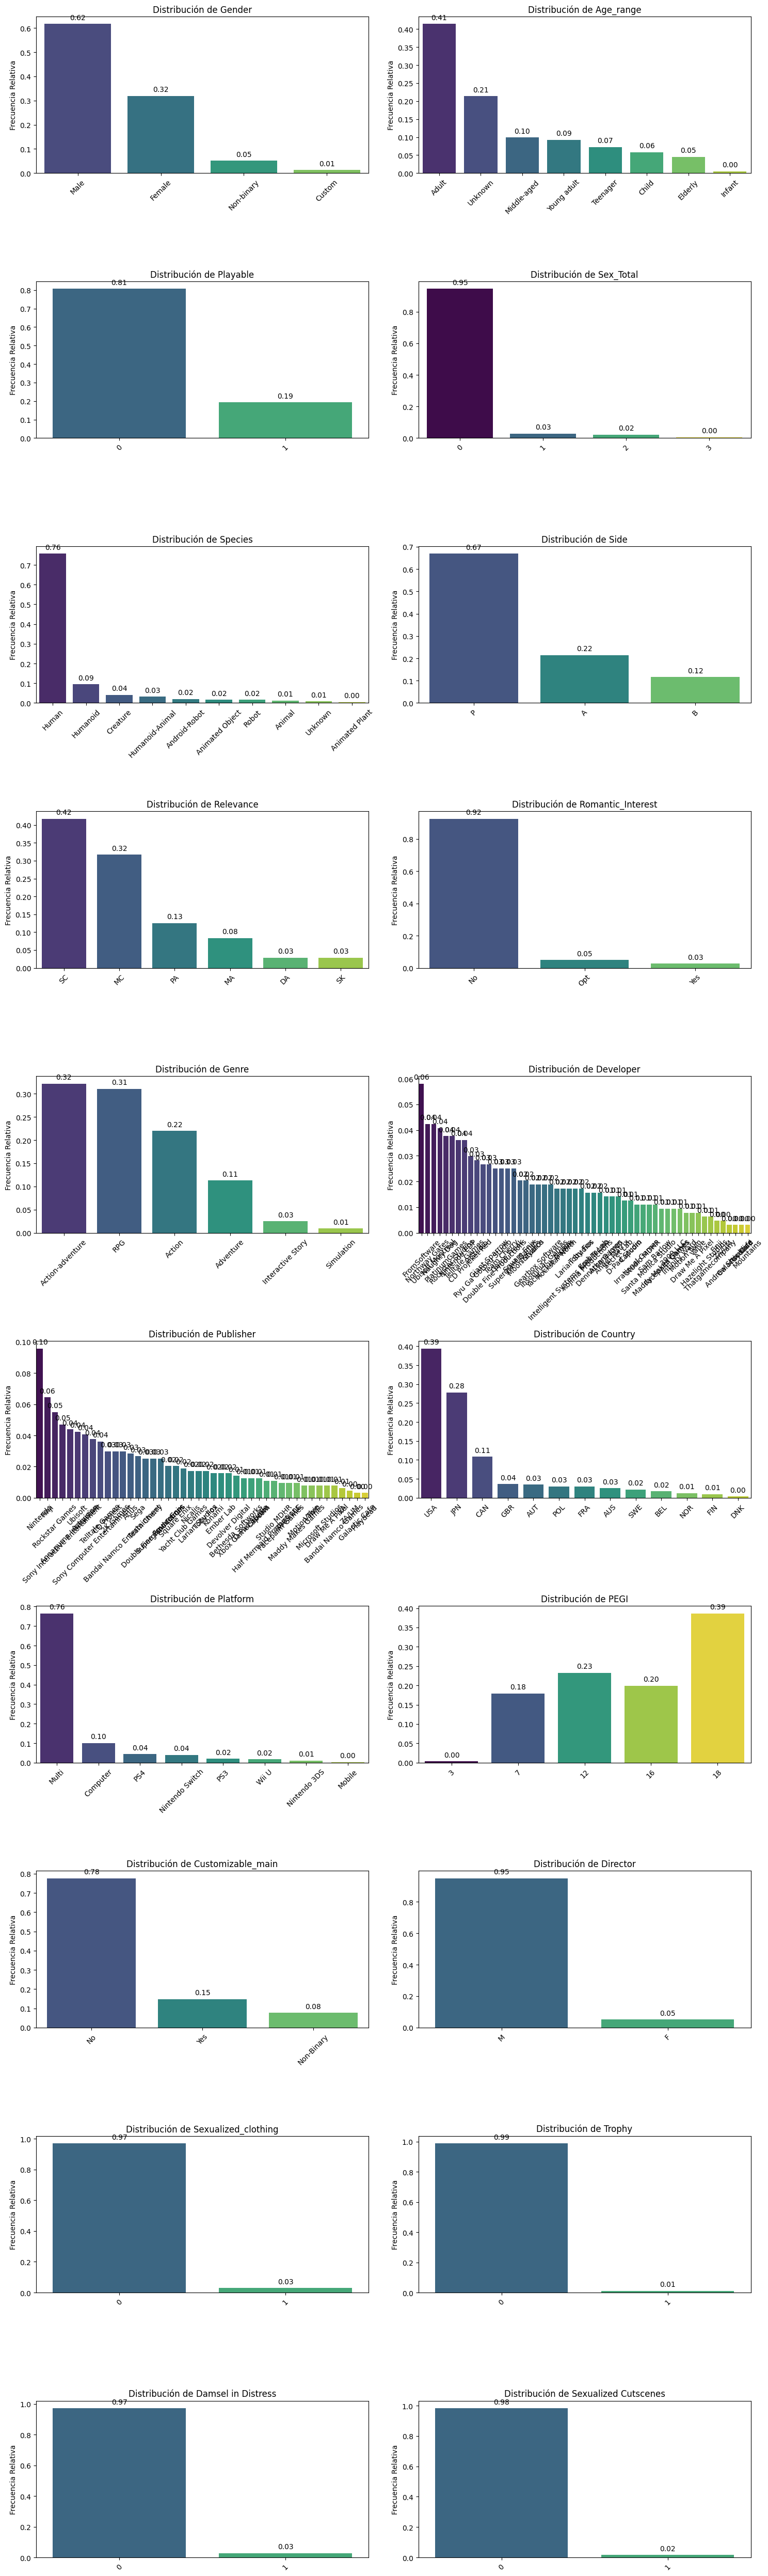

In [32]:
pinta_distribucion_categoricas(df, categoricas, relativa= True, mostrar_valores= True)

In [80]:

df[['Sex_Total', 'Protagonist', 'Protagonist_Non_Male', 'Relevant_males', 'Relevant_no_males', 'Total_team', 'female_team', 'Avg_Reviews']].describe()

,Sex_Total,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Total_team,female_team,Avg_Reviews
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.086342,1.254317,0.500785,8.105181,4.929356,7.335950,0.753532,9.050863
std,0.389022,0.597164,0.554072,4.056200,3.076034,3.373991,1.130136,0.451399
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.800000
25%,0.000000,1.000000,0.000000,5.000000,2.000000,6.000000,0.000000,8.700000
50%,0.000000,1.000000,0.000000,8.000000,5.000000,7.000000,0.000000,9.000000
75%,0.000000,1.000000,1.000000,11.000000,7.000000,9.000000,1.000000,9.500000
max,3.000000,4.000000,2.000000,17.000000,14.000000,16.000000,4.000000,9.900000


(8, 2)


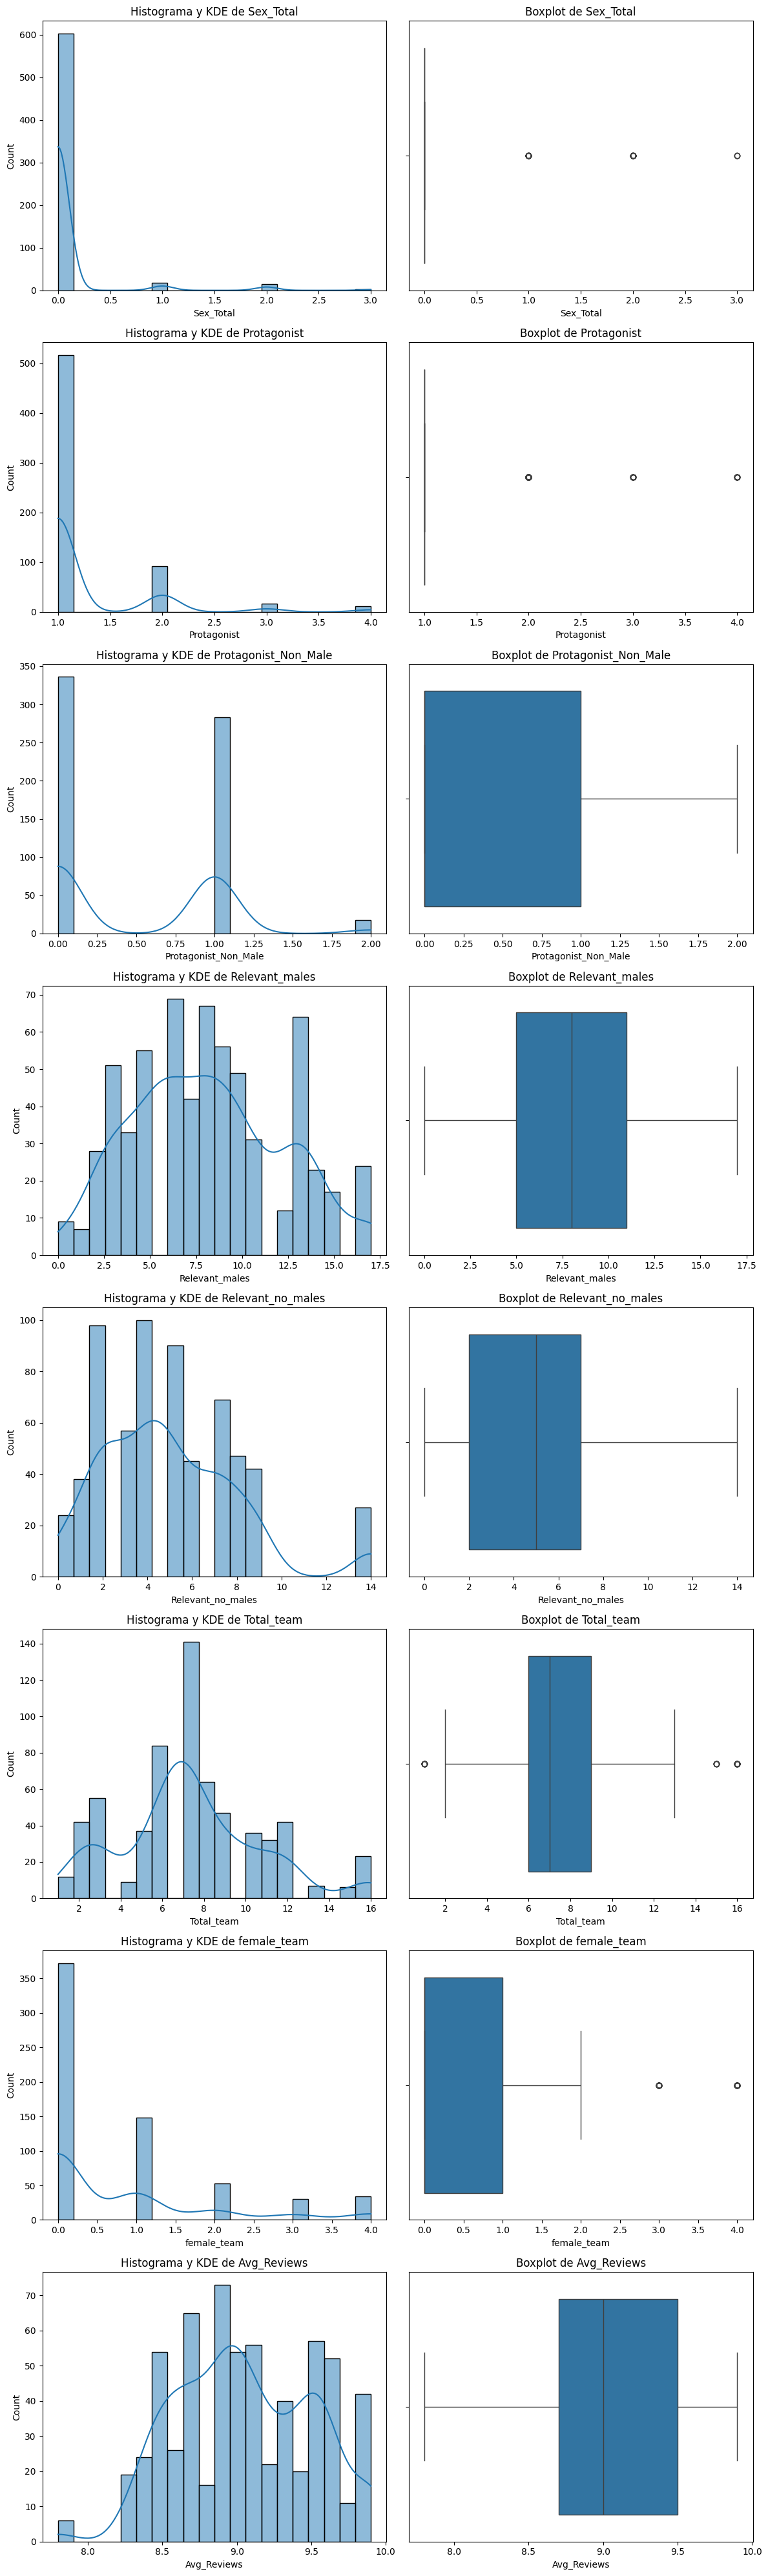

In [78]:
plot_combined_graphs(df, numericas, bins = 20)

Release  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
Gender                                                                   
Female     15    13    24    15    12    38    13    17    15    19    22
Male       42    24    42    46    28    65    29    40    23    21    33
Otros       4     2     2     6     1     6     2     2     3     2    11


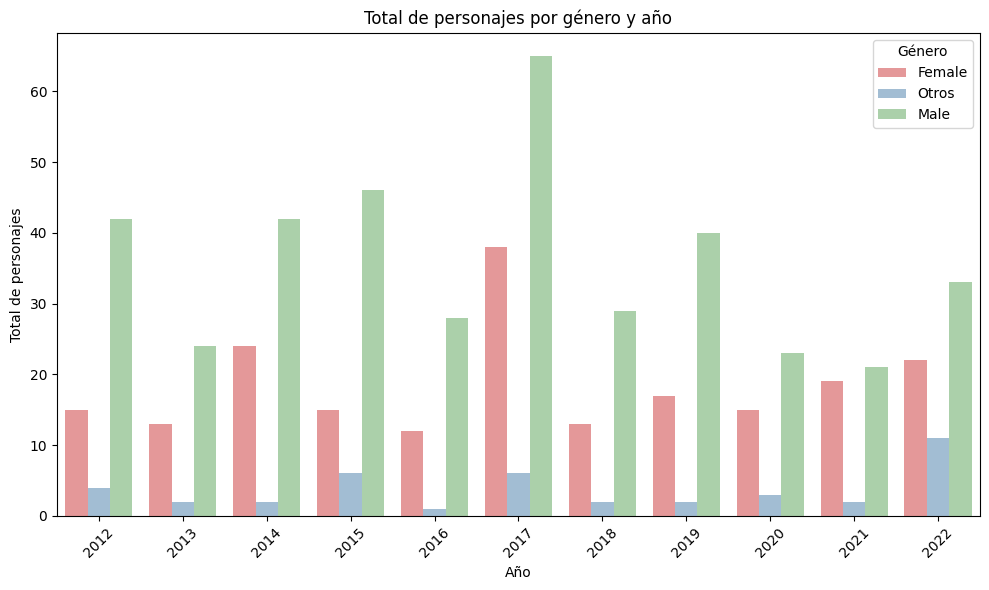

In [111]:
#Total de personajes por género y año

# 1 - Creacion del dataframe
   # Agrupar y contar el número total de personajes por año y género, tratando "Non-binary" y "Custom" como una categoría combinada llamada "Otros"
df['Gender'] = df['Gender'].replace({'Non-binary': 'Otros', 'Custom': 'Otros'})
characters_by_year_gender = df.groupby(['Gender','Release']).size().unstack(fill_value=0)

    # Imprimir el DataFrame resultante
print(characters_by_year_gender)

# 2 - Creación del gráfico de barras

# Crear el countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Release', hue='Gender', palette='Set1', alpha=0.5)

# Personalizar la gráfica
plt.title('Total de personajes por género y año')
plt.xlabel('Año')
plt.ylabel('Total de personajes')
plt.xticks(rotation=45)
plt.legend(title='Género')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

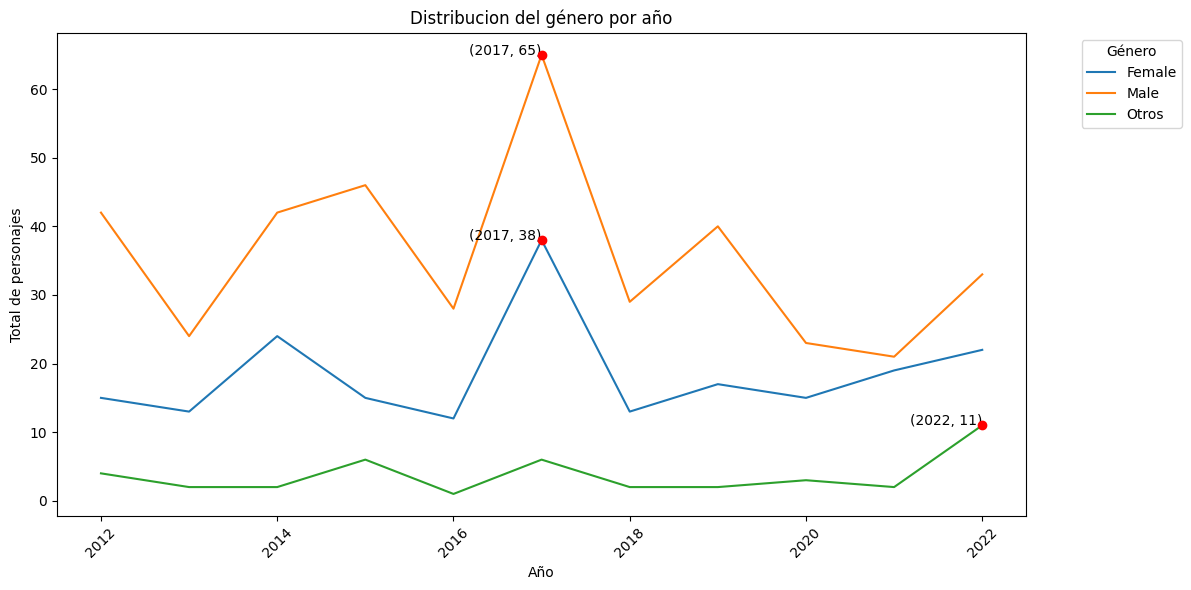

In [196]:
# Filtrar el DataFrame para obtener los datos necesarios
gender_distribution = df.groupby(['Release', 'Gender']).size().unstack(fill_value=0)

# Crear el gráfico de líneas
ax = gender_distribution.plot(kind='line', figsize=(12, 6))

# Identificar los picos y agregar un punto en cada uno
for gender in gender_distribution.columns:
    peak_years = gender_distribution[gender].idxmax()
    peak_counts = gender_distribution[gender].max()
    ax.scatter(peak_years, peak_counts, color='red', zorder=5)
    ax.text(peak_years, peak_counts, f'({peak_years}, {peak_counts})', ha='right')

# Personalizar la gráfica
plt.title('Distribucion del género por año')
plt.xlabel('Año')
plt.ylabel('Total de personajes')
plt.xticks(rotation=45)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


**Notas**
- La mayoría de los juegos del dataset se lanzaron en 2017.
- Se ve como los personajes masculinos superan en número siempre al resto de géneros y de forma abrumante, aunque hay fluctuaciones anuales.
- En 2021, se ve un aumento significativo de pnj femeninos y junto a otros, igualan a los pnj masculinos
- En 2022 se apostó por los personajes no binarios o personalizables y suponen el 50% con respecto a los de genero femenino y 1/3 del masculino. No obstante, tienen una presencia menor en general.

Gender             Female  Male  Otros
Genre                                 
Action                 38    97      5
Action-adventure       59   136     10
Adventure              28    37      7
Interactive Story       4     9      3
RPG                    72   110     16
Simulation              2     4      0


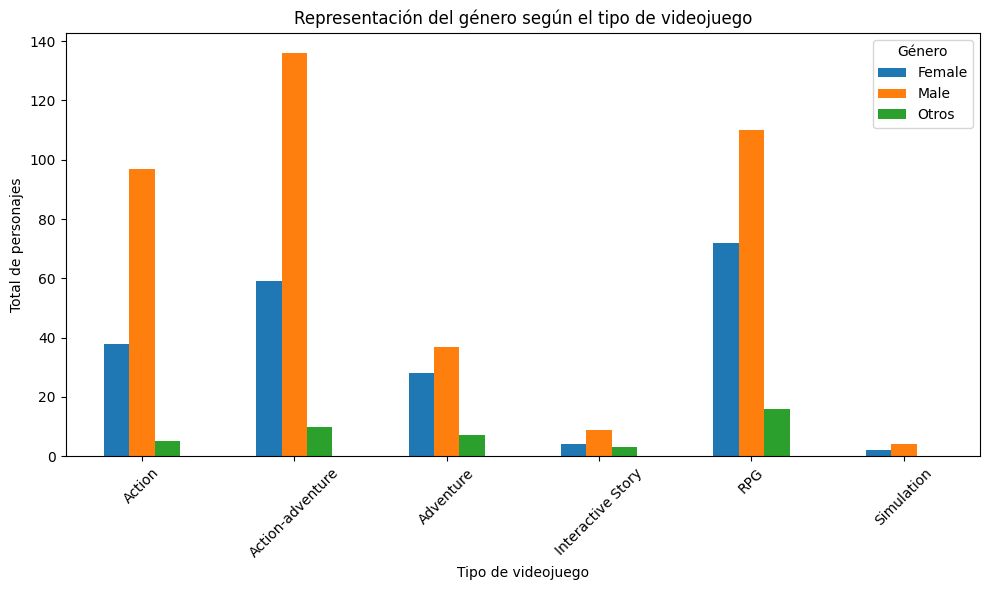

In [198]:
# Representación del género en diferentes tipos de videojuegos

# Filtrar el DataFrame para obtener los datos necesarios
gender_in_genre_df = df.groupby(["Genre", "Gender"]).size().unstack(fill_value=0)

print(gender_in_genre_df)

# Crear el gráfico de barras
gender_in_genre_df.plot(kind="bar", figsize=(10,6))

# Personalizacion
plt.title('Representación del género según el tipo de videojuego')
plt.xlabel('Tipo de videojuego')
plt.ylabel('Total de personajes')
plt.xticks(rotation=45)
plt.legend(title='Género')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


**Notas**
- Este grafico muestra que en los juegos de acción y los de accion y aventura, la tendencia es a tener una mayor proporcion de pernajes masculinos en comparacion con los femeninos. Esto coincide con la tendencia de protagonistas dominados por hombres en estos géneros.
-  Los juegos de aventura y de rol (rpg), parecen que tienen una representacion de genero mas equilibrada. Los personajes femeninos coinciden con más de la mitad de los masculinos.
- Los juegos de Aventura tienen mayor proporción femenina en comparación con otros. Podría deberse a que la industria de los videojuegos está avanzando lentamente hacia una mayor inclusión y diversidad en los últimos años
- Para los juegos de rol, el género incluye otras opciones, lo que indica un esfuerzo consciente para brindar diversas opciones a los jugadores
- Falta de videojuegos de tipo interactivo y de simulación en el dataset

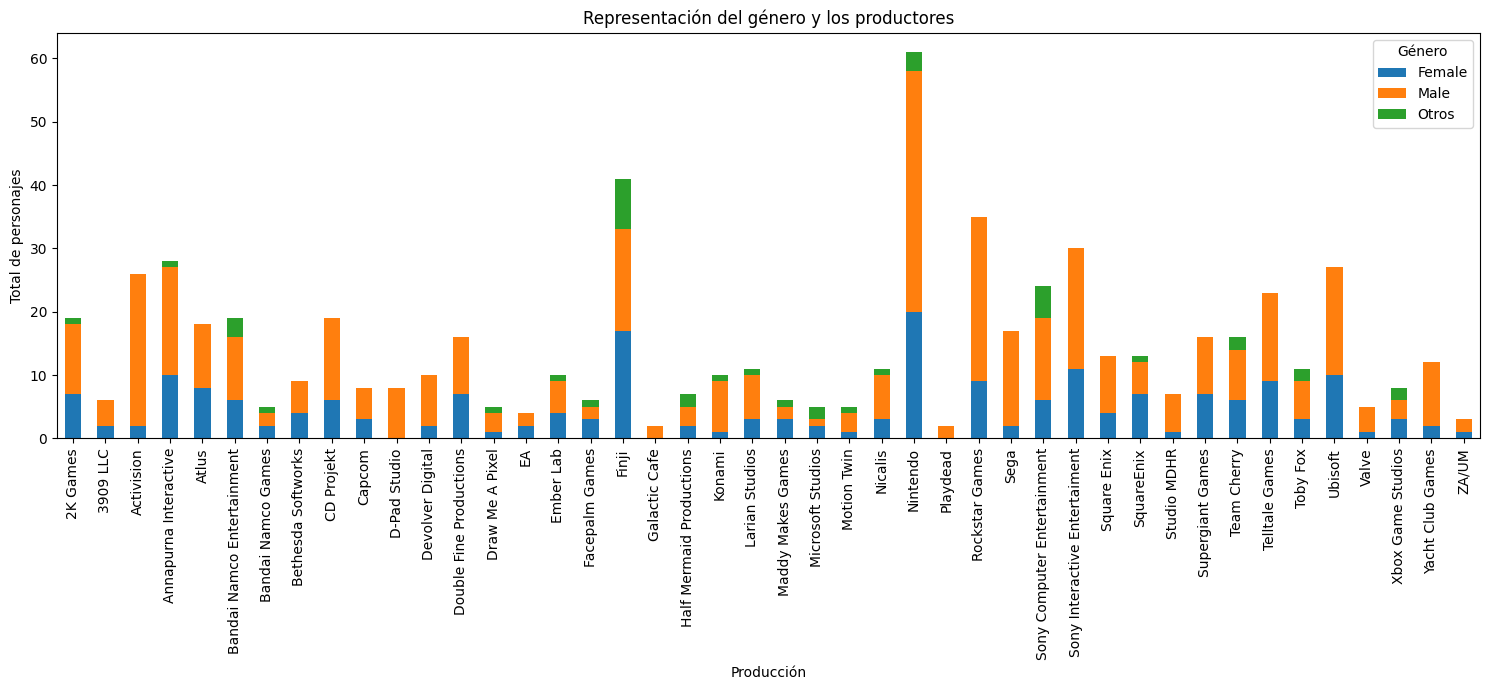

In [211]:
# Representacion del genero y los productores

# Separamos los datos
gender_publisher_df = df.groupby(["Publisher", "Gender"]).size().unstack(fill_value=0)

#Creacion de grafico de barras
gender_publisher_df.plot(kind="bar", stacked=True, figsize=(15,7))

# Personalizacion
plt.title('Representación del género y los productores')
plt.xlabel('Producción')
plt.ylabel('Total de personajes')
plt.legend(title='Género')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**Notas**
- Con este gráfico se muestra la decision de cada productor en cuanto a la representación de géneros en sus juegos más populares y revela la proporcion de pnjs de cada género.
- Se ve predominancia de más personajes masc frente a los femeninos.
- Solo 21 de 44  productores tienen otro tipos de personajes en sus juegos.
- Hay productores que solo incluyen personajes masculinos


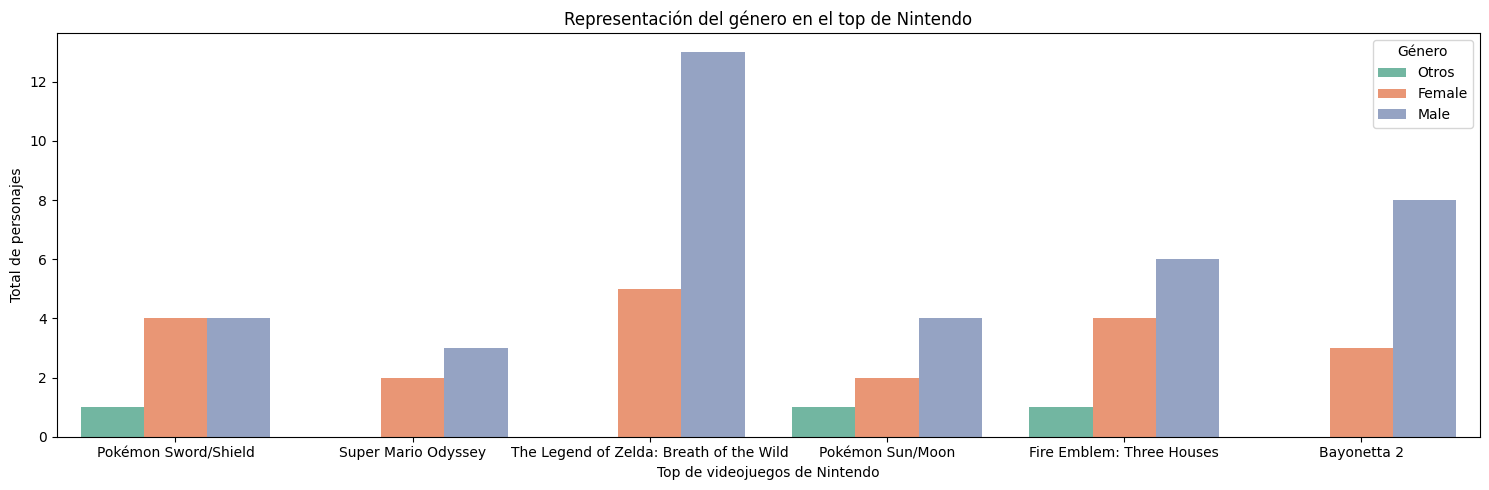

In [247]:
# Representación del género en Nintendo

# Filtrar el DataFrame para obtener solo los datos relacionados con el publisher Nintendo
nintendo_df = df[df['Publisher'] == 'Nintendo']

# Agrupar por título y calcular la media de la puntuación
avg_reviews_by_title = nintendo_df.groupby('Title')['Avg_Reviews'].mean()

# Seleccionar los 6 juegos con la mayor puntuación media
top_nintendo_titles = avg_reviews_by_title.nlargest(6)

# Filtrar el DataFrame original para incluir solo los juegos seleccionados
top_nintendo_games = nintendo_df[nintendo_df['Title'].isin(top_nintendo_titles.index)]


# Crear el gráfico de barras
plt.figure(figsize=(15, 5))
sns.countplot(data=top_nintendo_games, x='Title', hue='Gender', palette="Set2")
plt.title('Representación del género en el top de Nintendo')
plt.xlabel('Top de videojuegos de Nintendo')
plt.ylabel('Total de personajes')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

**Notas**
- Es casi imposible encontrar un productor o un desarrollador que sea representativo de toda la industria, pero el impacto de Nintendo es el mayor.
- Se muestra que los juegos más vendidos de Nintendo tienen personajes masculinos.
- En el gráfico no se muestra el sexismo dentro de las narrativas por lo que habría que verlo.
- La principal representacion "igual" en Pkm Espada/Escudo es porque puedes elegir el genero y los personajes en el juego no son representativos solo sirven para llevar batallas por turnos.
- Zelda es uno de los juegos más icónicos, pero el representante es Link, un hombre.
- Bayonetta, es uno de los personajes más sexualizados de Nintendo, pero es la protagonista. Tendría sentido que su aspecto se deba a algo más.

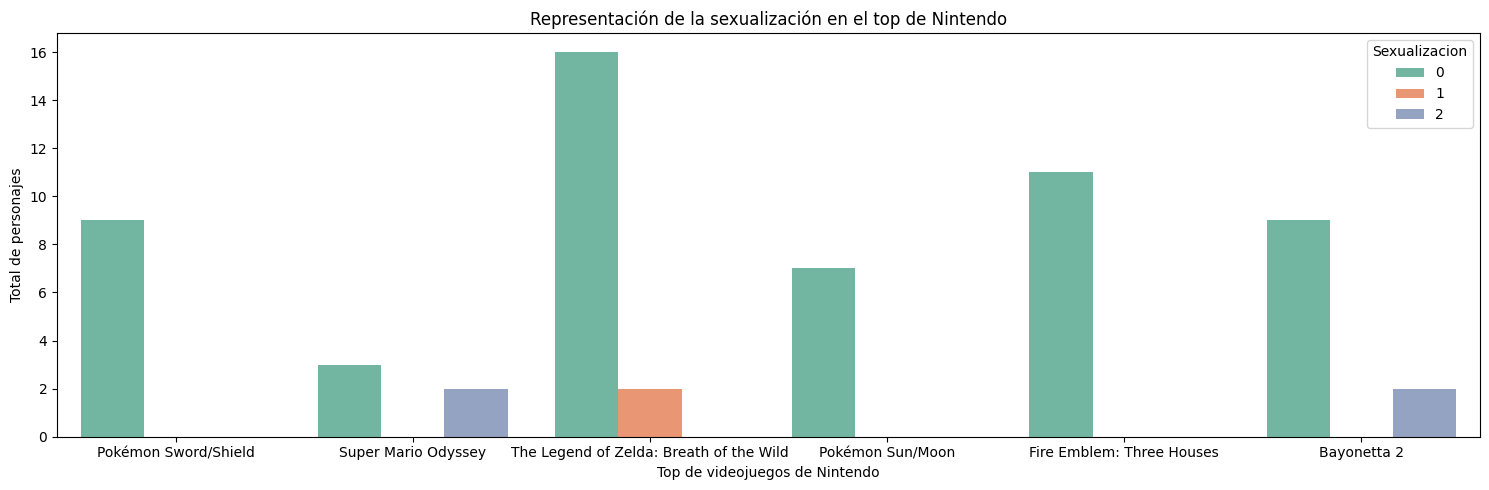

In [250]:
# Representación de la sexualización en el top de Nintendo

# Crear el gráfico de barras
plt.figure(figsize=(15, 5))
sns.countplot(data=top_nintendo_games, x='Title', hue='Sex_Total', palette="Set2")
plt.title('Representación de la sexualización en el top de Nintendo')
plt.xlabel('Top de videojuegos de Nintendo')
plt.ylabel('Total de personajes')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Sexualizacion')
plt.tight_layout()
plt.show()

**Notas**
- Como resaltaba anteriormente, la sexualizacion es evidente en Bayonetta, pero tambien en Zelda (princesa en apuros) y en Mario (princesas en apuros)

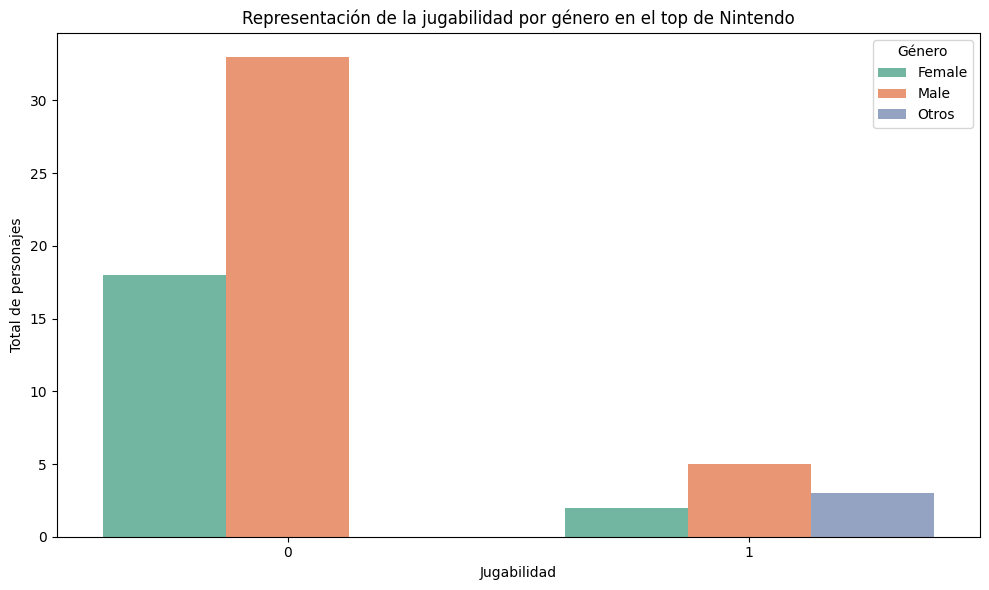

In [256]:
# Representación de la jugabilidad por género en el top de Nintendo

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=top_nintendo_games, x='Playable', hue='Gender', palette="Set2")
plt.title('Representación de la jugabilidad por género en el top de Nintendo')
plt.xlabel('Jugabilidad')
plt.ylabel('Total de personajes')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

**Notas**
- Destaca que entre los personajes jugables (1), la mayoría sean masculinos y que otros géneros jugables superan también a los personajes femeninos jugables.
- En el dataset abundan los personajes que no son jugables por lo que vemos en la barra con el 0 (no jugable)

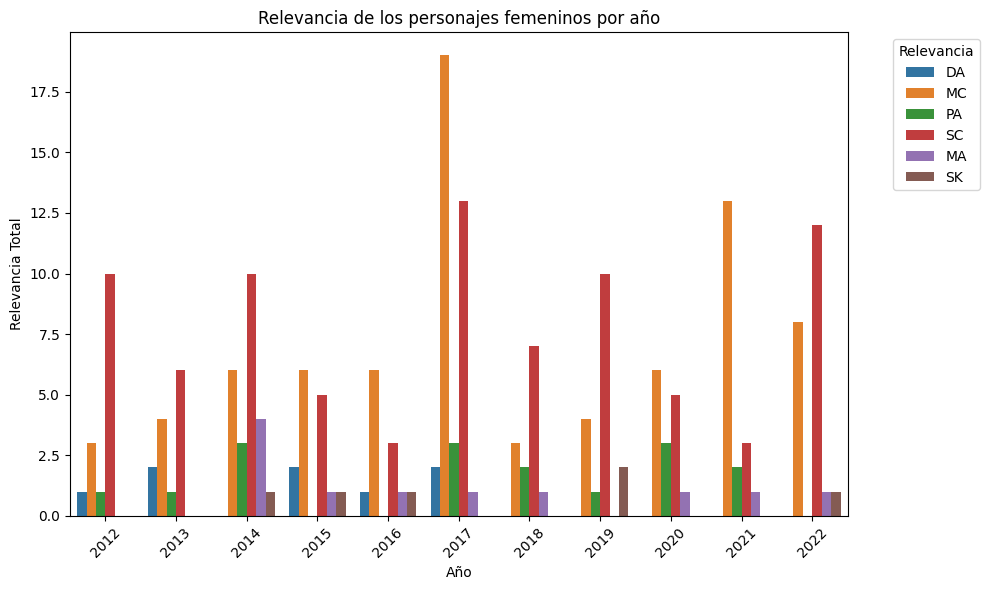

In [38]:
# Relevancia de los personajes femeninos por año

# Filtrar el DataFrame original para obtener solo los datos de género femenino
female_characters_df = df[df['Gender'] == 'Female']

# Realizar la agrupación y contar el total de personajes por relevancia y año
total_relevance_by_year_female = female_characters_df.groupby(['Release', 'Relevance']).size().reset_index(name='total_relevance')

# Crear el gráfico de barras con plt
plt.figure(figsize=(10, 6))
sns.barplot(data=total_relevance_by_year_female, x='Release', y='total_relevance', hue='Relevance')
plt.title('Relevancia de los personajes femeninos por año')
plt.xlabel('Año')
plt.ylabel('Relevancia Total')
plt.xticks(rotation=45)
plt.legend(title='Relevancia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [63]:
total_relevance_by_year_female

,Release,Relevance,total_relevance
0,2012,MA,3
1,2012,MC,6
2,2012,PA,8
3,2012,SC,25
4,2013,MA,2
5,2013,MC,3
6,2013,PA,6
7,2013,SC,12
8,2013,SK,1
9,2014,MA,2


**Notas**
- En 2012, 2013, 2014, 2018, 2019 y 2022, la mayoría de los personajes femeninos son personajes secundarios.
- En 2015, 2016, 2017 (sobre todo), 2020 y 2021, los personajes femeninos son personajes centrales.

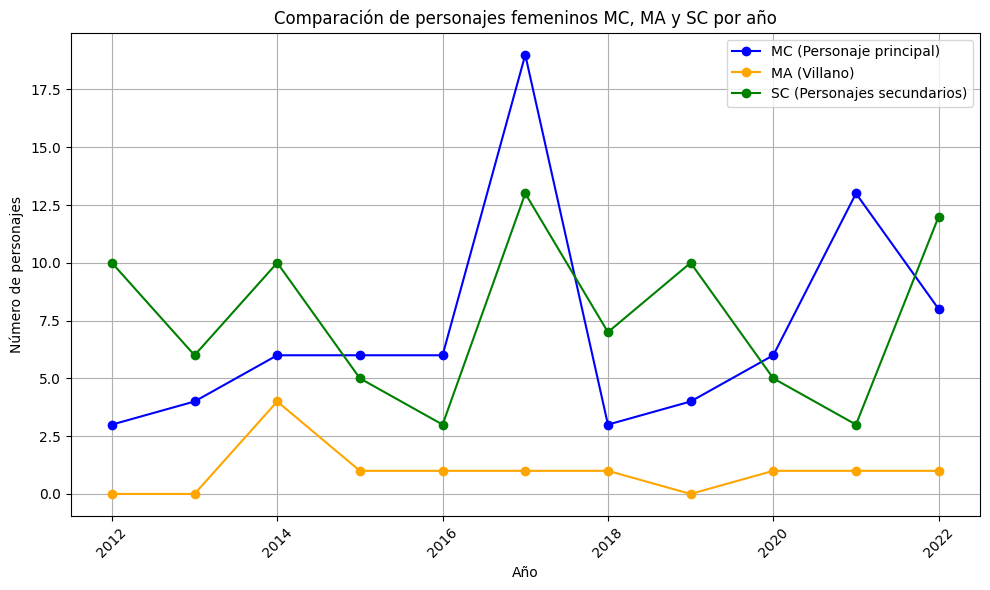

In [57]:
# Filtrar el DataFrame original para obtener solo los personajes femeninos
female_characters_df = df[df['Gender'] == 'Female']

# Filtrar por relevancia PA (protagonistas)
female_pa_df = female_characters_df[female_characters_df['Relevance'] == 'MC']

# Filtrar por relevancia MA (deuteragonistas)
female_ma_df = female_characters_df[female_characters_df['Relevance'] == 'MA']

# Filtrar por relevancia SC (personajes secundarios)
female_sc_df = female_characters_df[female_characters_df['Relevance'] == 'SC']

# Agrupar y contar el número de personajes femeninos PA por año
female_pa_counts = female_pa_df.groupby('Release').size().reset_index(name='MC')

# Agrupar y contar el número de personajes femeninos MA por año
female_ma_counts = female_ma_df.groupby('Release').size().reset_index(name='MA')

# Agrupar y contar el número de personajes femeninos SC por año
female_sc_counts = female_sc_df.groupby('Release').size().reset_index(name='SC')

# Unir los DataFrames por el año (Release)
merged_df = pd.merge(female_pa_counts, female_ma_counts, on='Release', how='outer').fillna(0)
merged_df_female = pd.merge(merged_df, female_sc_counts, on='Release', how='outer').fillna(0)

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(merged_df_female['Release'], merged_df_female['MC'], marker='o', label='MC (Personaje principal)', color='blue')
plt.plot(merged_df_female['Release'], merged_df_female['MA'], marker='o', label='MA (Villano)', color='orange')
plt.plot(merged_df_female['Release'], merged_df_female['SC'], marker='o', label='SC (Personajes secundarios)', color='green')
plt.title('Comparación de personajes femeninos MC, MA y SC por año')
plt.xlabel('Año')
plt.ylabel('Número de personajes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [59]:
merged_df_female

,Release,MC,MA,SC
0,2012,3,0.0,10
1,2013,4,0.0,6
2,2014,6,4.0,10
3,2015,6,1.0,5
4,2016,6,1.0,3
5,2017,19,1.0,13
6,2018,3,1.0,7
7,2019,4,0.0,10
8,2020,6,1.0,5
9,2021,13,1.0,3


**Notas**
Teniendo el cuenta el total de juegos analizados en cada año y aparecen personajes femeninos, se puede observar en la gráfica que en 2017 y 2019, el numero de personajes principales fue bastante alto. En 2017 y 2022 también destaca el gran numero de personajes secundarios femeninos

In [61]:
total_relevance_by_year_male


,Release,Relevance,total_relevance
0,2012,MA,3
1,2012,MC,6
2,2012,PA,8
3,2012,SC,25
4,2013,MA,2
5,2013,MC,3
6,2013,PA,6
7,2013,SC,12
8,2013,SK,1
9,2014,MA,2


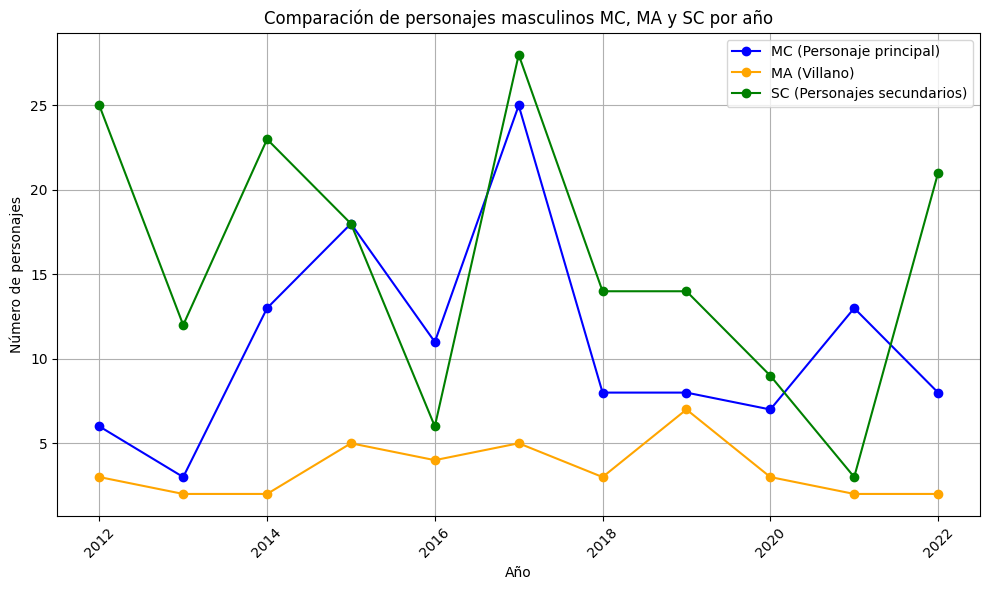

In [58]:
# Filtrar el DataFrame original para obtener solo los personajes femeninos
male_characters_df = df[df['Gender'] == 'Male']

# Filtrar por relevancia PA (protagonistas)
male_pa_df = male_characters_df[male_characters_df['Relevance'] == 'MC']

# Filtrar por relevancia MA (deuteragonistas)
male_ma_df = male_characters_df[male_characters_df['Relevance'] == 'MA']

# Filtrar por relevancia SC (personajes secundarios)
male_sc_df = male_characters_df[male_characters_df['Relevance'] == 'SC']

# Agrupar y contar el número de personajes femeninos PA por año
male_pa_counts = male_pa_df.groupby('Release').size().reset_index(name='MC')

# Agrupar y contar el número de personajes femeninos MA por año
male_ma_counts = male_ma_df.groupby('Release').size().reset_index(name='MA')

# Agrupar y contar el número de personajes femeninos SC por año
male_sc_counts = male_sc_df.groupby('Release').size().reset_index(name='SC')

# Unir los DataFrames por el año (Release)
merged_df = pd.merge(male_pa_counts, male_ma_counts, on='Release', how='outer').fillna(0)
merged_df_male = pd.merge(merged_df, male_sc_counts, on='Release', how='outer').fillna(0)

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(merged_df_male['Release'], merged_df_male['MC'], marker='o', label='MC (Personaje principal)', color='blue')
plt.plot(merged_df_male['Release'], merged_df_male['MA'], marker='o', label='MA (Villano)', color='orange')
plt.plot(merged_df_male['Release'], merged_df_male['SC'], marker='o', label='SC (Personajes secundarios)', color='green')
plt.title('Comparación de personajes masculinos MC, MA y SC por año')
plt.xlabel('Año')
plt.ylabel('Número de personajes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
merged_df_male

,Release,MC,MA,SC
0,2012,6,3,25
1,2013,3,2,12
2,2014,13,2,23
3,2015,18,5,18
4,2016,11,4,6
5,2017,25,5,28
6,2018,8,3,14
7,2019,8,7,14
8,2020,7,3,9
9,2021,13,2,3


In [74]:
df["Gender"].value_counts()

Gender
Male          393
Female        203
Non-binary     33
Custom          8
Name: count, dtype: int64

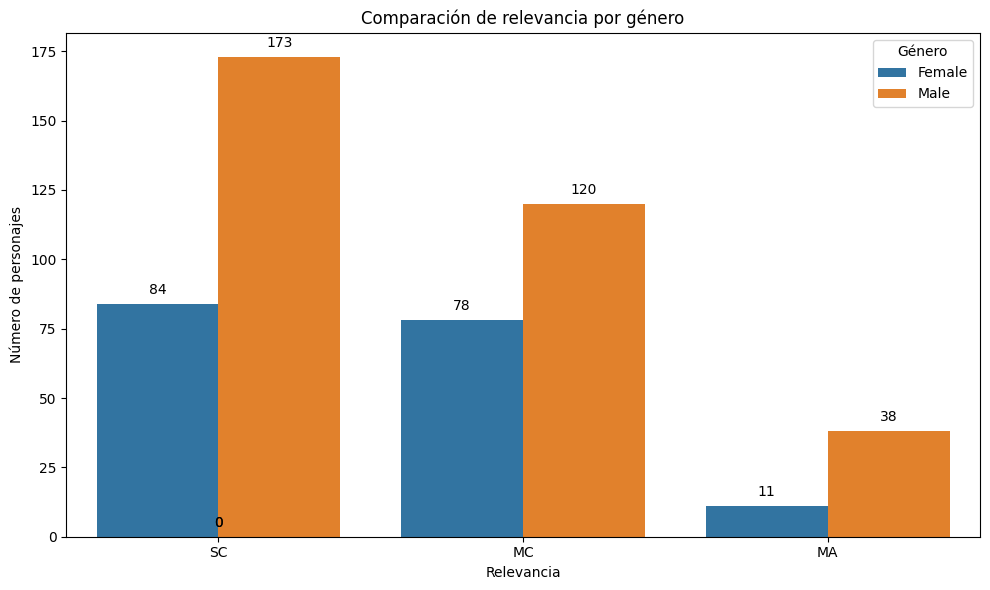

In [72]:
# comparación de la relevancia por genero fem vs masc

# Filtrar el DataFrame original para incluir solo las categorías de género y relevancia deseadas
filtered_df = df[(df['Gender'].isin(['Female', 'Male'])) & (df['Relevance'].isin(['MC', 'MA', 'SC']))]

# Crear la gráfica de barras agrupadas
plt.figure(figsize=(10, 6))
ax= sns.countplot(data=filtered_df, x='Relevance', hue='Gender')

# Agregar valores en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Comparación de relevancia por género')
plt.xlabel('Relevancia')
plt.ylabel('Número de personajes')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


**Notas**
Como era de esperar el genero masculino impera en todas las categorías, dejando en un segundo plano al femenino

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13404\4124854738.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=percentage_df, x='Relevance', y='Percentage', hue='Gender', ci=None)


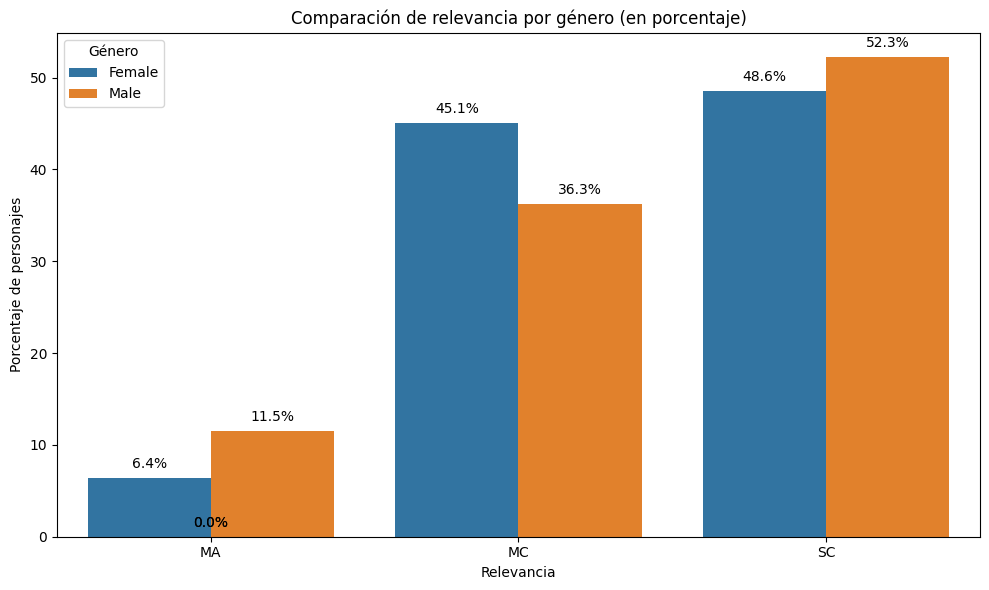

In [70]:
# comparación de la relevancia por genero fm vs masc en porcentaje

# Filtrar el DataFrame original para incluir solo las categorías de género y relevancia deseadas
filtered_df = df[(df['Gender'].isin(['Female', 'Male'])) & (df['Relevance'].isin(['MC', 'MA', 'SC']))]

# Calcular el porcentaje de cada categoría en relación con el total de personajes
total_counts = filtered_df.groupby('Gender')['Relevance'].count()
percentage_df = (filtered_df.groupby(['Gender', 'Relevance']).size() / total_counts) * 100
percentage_df = percentage_df.reset_index(name='Percentage')

# Crear la gráfica de barras agrupadas con porcentajes
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentage_df, x='Relevance', y='Percentage', hue='Gender', ci=None)

# Agregar porcentajes en cada barra
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Comparación de relevancia por género (en porcentaje)')
plt.xlabel('Relevancia')
plt.ylabel('Porcentaje de personajes')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


**Notas**
Estos datos es sobre el 100% de pnj masculinos y femeninos
Llama la atención que los main characters femeninos tengan un porcentaje superior al masculino y que sea al contrario en el caso de los personajes secundarios. 
Pensaba que sería al contrario y me ha sorprendido gratamente. 
En cuanto a los villanos, parece que el malo malísimo debe ser un personaje masculino.

In [115]:
percentage_df

,Gender,Relevance,Percentage
0,Female,MA,6.358382
1,Female,MC,45.086705
2,Female,SC,48.554913
3,Male,MA,11.480363
4,Male,MC,36.253776
5,Male,SC,52.265861


In [125]:
# comparación de la relevancia por genero: fem vs masc vs otros en porcentaje

# Filtrar el DataFrame original para incluir solo las relevancias MA, MC y SC
relevant_characters_df = df[df['Relevance'].isin(['MA', 'MC', 'SC'])]

# Agrupar por género y relevancia y contar el número de personajes
grouped_df = relevant_characters_df.groupby(['Gender', 'Relevance']).size().reset_index(name='count')

# Calcular el total de personajes con relevancias MA, MC y SC en cada género
total_per_relevance_per_gender = grouped_df.groupby('Gender')['count'].transform('sum')

# Calcular el porcentaje de personajes con cada relevancia sobre el total de personajes con esa misma relevancia en cada género
grouped_df['percentage'] = (grouped_df['count'] / total_per_relevance_per_gender) * 100

grouped_df

,Gender,Relevance,count,percentage
0,Female,MA,11,6.358382
1,Female,MC,78,45.086705
2,Female,SC,84,48.554913
3,Male,MA,38,11.480363
4,Male,MC,120,36.253776
5,Male,SC,173,52.265861
6,Otros,MA,4,23.529412
7,Otros,MC,4,23.529412
8,Otros,SC,9,52.941176


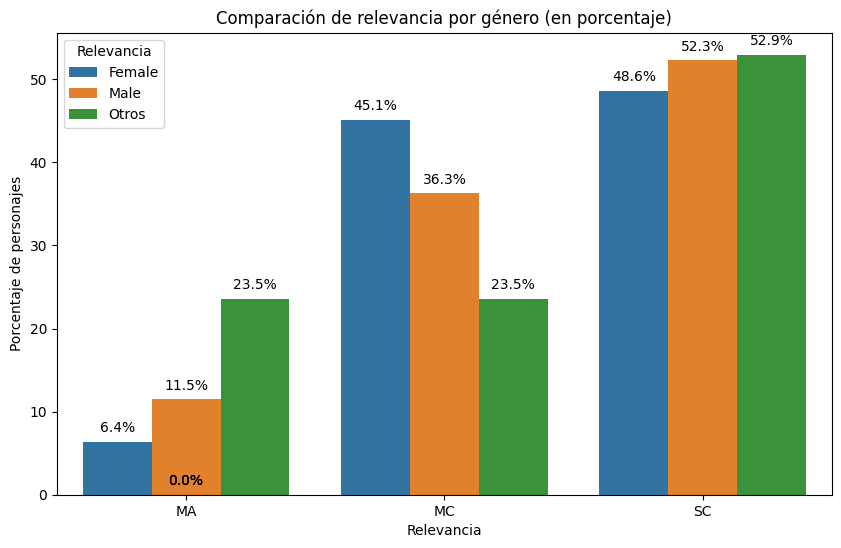

In [127]:
# Dibujo de comparación de la relevancia por genero: fem vs masc vs otros en porcentaje

# Filtrar el DataFrame original para incluir solo las relevancias MA, MC y SC
relevant_characters_df = df[df['Relevance'].isin(['MA', 'MC', 'SC'])]

# Agrupar por género y relevancia y contar el número de personajes
grouped_df = relevant_characters_df.groupby(['Gender', 'Relevance']).size().reset_index(name='count')

# Calcular el total de personajes con relevancias MA, MC y SC en cada género
total_per_relevance_per_gender = grouped_df.groupby('Gender')['count'].transform('sum')

# Calcular el porcentaje de personajes con cada relevancia sobre el total de personajes con esa misma relevancia en cada género
grouped_df['percentage'] = (grouped_df['count'] / total_per_relevance_per_gender) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=grouped_df, x='Relevance', y='percentage', hue='Gender')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.title('Comparación de relevancia por género (en porcentaje)')
plt.xlabel('Relevancia')
plt.ylabel('Porcentaje de personajes')
plt.legend(title='Relevancia')
plt.show()


**Notas**
- MA: sorprende ver que otros generos superan al resto en esta categoria.
- MC: para sorpresa, los mc fem superan (por menos del 10%) a los mc masc
- SC: los porcentajes están muy igualados, destacando pnj de otros generos por un 0,6% vs masc

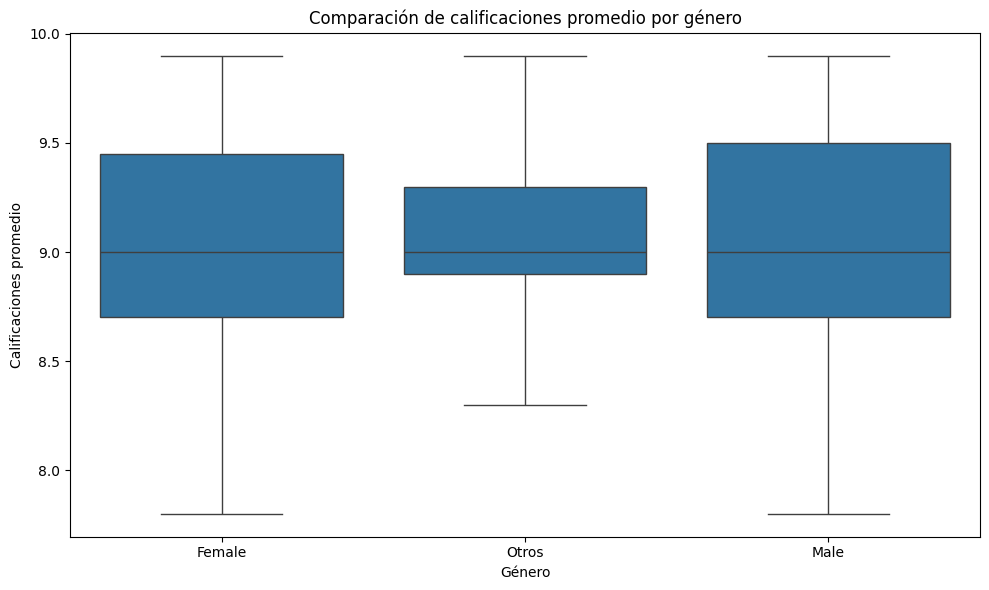

In [135]:
# Comparación de calificacion promedio por género
 
 # Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Avg_Reviews')

# Personalizar la gráfica
plt.title('Comparación de calificaciones promedio por género')
plt.xlabel('Género')
plt.ylabel('Calificaciones promedio')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**Notas**
- La media de todos es 9
- La mediana de otros es la más grande en comparacion con pnj fem y masc

In [151]:
# conocer los mejores y peores juegos segun la media de puntuacion y el genero fem o masc y ver si los del top están sexualizados

# Seleccionar los 5 mejores juegos con personajes femeninos y relevance MC
top_female_mc_games = df[(df['Gender'] == 'Female') & (df['Relevance'] == 'MC')].nlargest(5, 'Avg_Reviews')

# Seleccionar los 5 mejores juegos con personajes masculinos y relevance MC
top_male_mc_games = df[(df['Gender'] == 'Male') & (df['Relevance'] == 'MC')].nlargest(5, 'Avg_Reviews')

# Mostrar los resultados
print("Top 5 juegos con personajes femeninos y relevance MC:")
print(top_female_mc_games[['Title', 'Name', 'Sex_Total', 'Avg_Reviews']])

print("\nTop 5 juegos con personajes masculinos y relevance MC:")
print(top_male_mc_games[['Title', 'Name', 'Sex_Total','Avg_Reviews']])


Top 5 juegos con personajes femeninos y relevance MC:
                                       Title             Name  Sex_Total  \
27   The Legend of Zelda: Breath of the Wild            Mipha          0   
28   The Legend of Zelda: Breath of the Wild           Urbosa          1   
268                               Elden Ring  Ranni the Witch          0   
6                        Super Mario Odyssey            Peach          2   
535                              Bayonetta 2           Jeanne          2   

     Avg_Reviews  
27           9.9  
28           9.9  
268          9.9  
6            9.8  
535          9.7  

Top 5 juegos con personajes masculinos y relevance MC:
                                       Title     Name  Sex_Total  Avg_Reviews
96   The Legend of Zelda: Breath of the Wild    Daruk          0          9.9
97   The Legend of Zelda: Breath of the Wild   Revali          0          9.9
98   The Legend of Zelda: Breath of the Wild    Rhoam          0          9.9
534    

In [163]:
# Seleccionar los 5 peores juegos con personajes femeninos y relevance MC
bottom_female_mc_games = df[(df['Gender'] == 'Female') & (df['Relevance'] == 'MC')].nsmallest(5, 'Avg_Reviews')

# Seleccionar los 5 peores juegos con personajes masculinos y relevance MC
bottom_male_mc_games = df[(df['Gender'] == 'Male') & (df['Relevance'] == 'MC')].nsmallest(5, 'Avg_Reviews')

# Mostrar los resultados
print("Top 5 juegos con personajes femeninos y relevance MC:")
print(bottom_female_mc_games[['Title', 'Sex_Total','Avg_Reviews']])

print("\nTop 5 juegos con personajes masculinos y relevance MC:")
print(bottom_male_mc_games[['Title',  'Sex_Total','Avg_Reviews']])


Top 5 juegos con personajes femeninos y relevance MC:
                                  Title  Sex_Total  Avg_Reviews
4                  Pokémon Sword/Shield          0          8.3
617  Marvel's Spider-Man: Miles Morales          0          8.4
622  Marvel's Spider-Man: Miles Morales          0          8.4
626  Marvel's Spider-Man: Miles Morales          0          8.4
39                        Borderlands 2          1          8.5

Top 5 juegos con personajes masculinos y relevance MC:
                            Title  Sex_Total  Avg_Reviews
71   Call of Duty: Modern Warfare          0          7.8
73   Call of Duty: Modern Warfare          0          7.8
69           Pokémon Sword/Shield          0          8.3
630       Kena: Bridge of Spirits          0          8.3
127     Call of Duty: Black Ops 2          0          8.4


**Notas**
- No hay apenas diferencia entre las mejores y peores puntuaciones, ya que en el top hay tanto pnj mc fem como masc, y lo mismo con el bottom 
- 3/5 pnj fem fueron sexualizados 

In [159]:
#Conocer el género de los directores de los 5 mejores juegos y los 5 peores y el porcentaje de mujeres en el equipo de desarrollo

# Seleccionar los 5 juegos con mejor avg review (asegurando que los títulos sean distintos)
top_games = df.sort_values(by=['Avg_Reviews', 'Total_team'], ascending=[False, False]).drop_duplicates(subset=['Title', 'Director']).head(5)

# Seleccionar los 5 juegos con peor avg review (asegurando que los títulos sean distintos)
bottom_games = df.sort_values(by=['Avg_Reviews', 'Total_team'], ascending=[True, False]).drop_duplicates(subset=['Title', 'Director']).head(5)

# Mostrar los resultados
print("Top 5 juegos con mejor avg review:")
print(top_games[['Title', 'Director', 'Team_percentage', 'Avg_Reviews']])

print("\nTop 5 juegos con peor avg review:")
print(bottom_games[['Title', 'Director', 'Team_percentage', 'Avg_Reviews']])


Top 5 juegos con mejor avg review:
                                       Title Director Team_percentage  \
7    The Legend of Zelda: Breath of the Wild        M              0%   
259                               Elden Ring        M              0%   
6                        Super Mario Odyssey        M              9%   
533                              Bayonetta 2        M             17%   
560     Metal Gear Solid V: The Phantom Pain        M              0%   

     Avg_Reviews  
7            9.9  
259          9.9  
6            9.8  
533          9.7  
560          9.6  

Top 5 juegos con peor avg review:
                                  Title Director Team_percentage  Avg_Reviews
0          Call of Duty: Modern Warfare        M              0%          7.8
1                  Pokémon Sword/Shield        M             11%          8.3
627             Kena: Bridge of Spirits        M             33%          8.3
125           Call of Duty: Black Ops 2        M              0% 

**Notas**
- Top 5: 2/5 mujeres en el equipo
- Bottom 5: 3/5 mujeres en el equipo. El porcentaje de mujeres es inferior al 50% en ambos casos

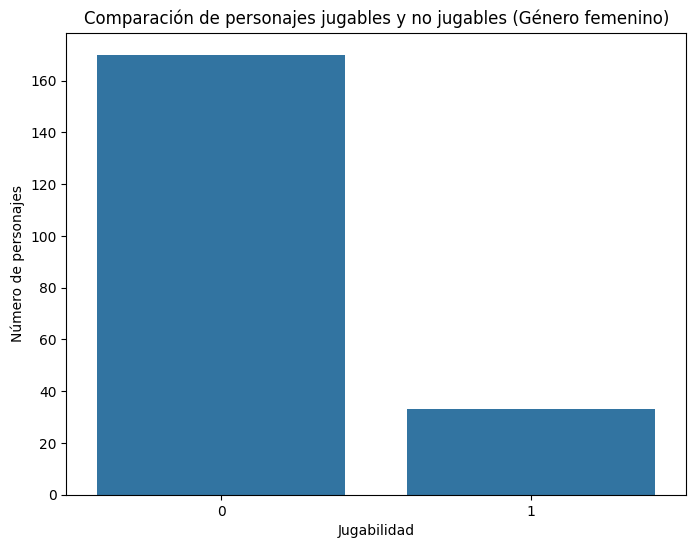

In [166]:
# comparativa de jugable o no para el genero fem

# Filtrar el DataFrame para obtener solo los datos del género femenino
female_df = df[df['Gender'] == 'Female']

# Contar el número de personajes jugables y no jugables
playable_counts = female_df['Playable'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=playable_counts.index, y=playable_counts.values)
plt.title('Comparación de personajes jugables y no jugables (Género femenino)')
plt.xlabel('Jugabilidad')
plt.ylabel('Número de personajes')
plt.show()


Hay muy pocos juegos con personajes femeninos jugables

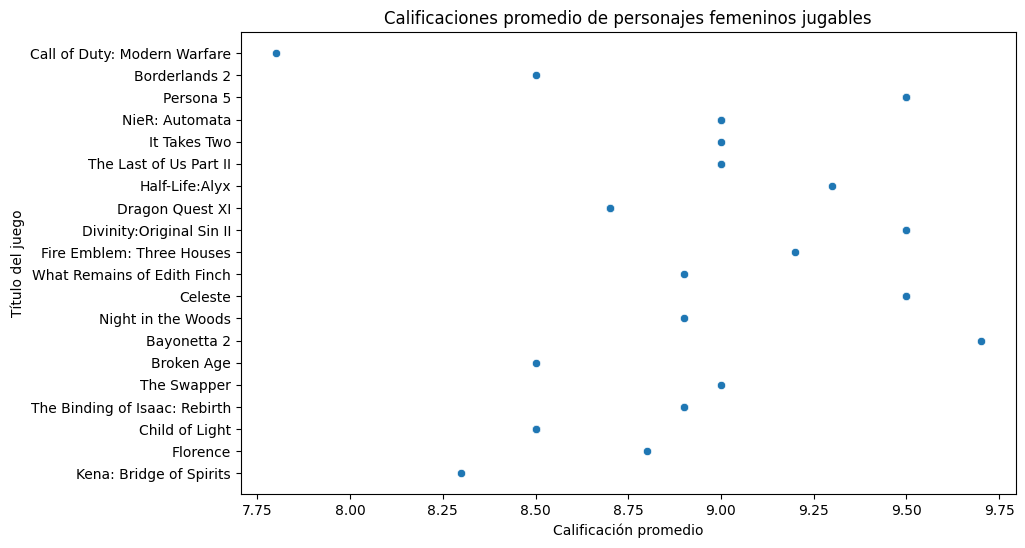

In [168]:
# Filtrar el DataFrame para obtener solo los datos de personajes femeninos jugables
female_playable_df = df[(df['Gender'] == 'Female') & (df['Playable'] == 1)]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=female_playable_df, x='Avg_Reviews', y='Title')
plt.title('Calificaciones promedio de personajes femeninos jugables')
plt.xlabel('Calificación promedio')
plt.ylabel('Título del juego')
plt.show()


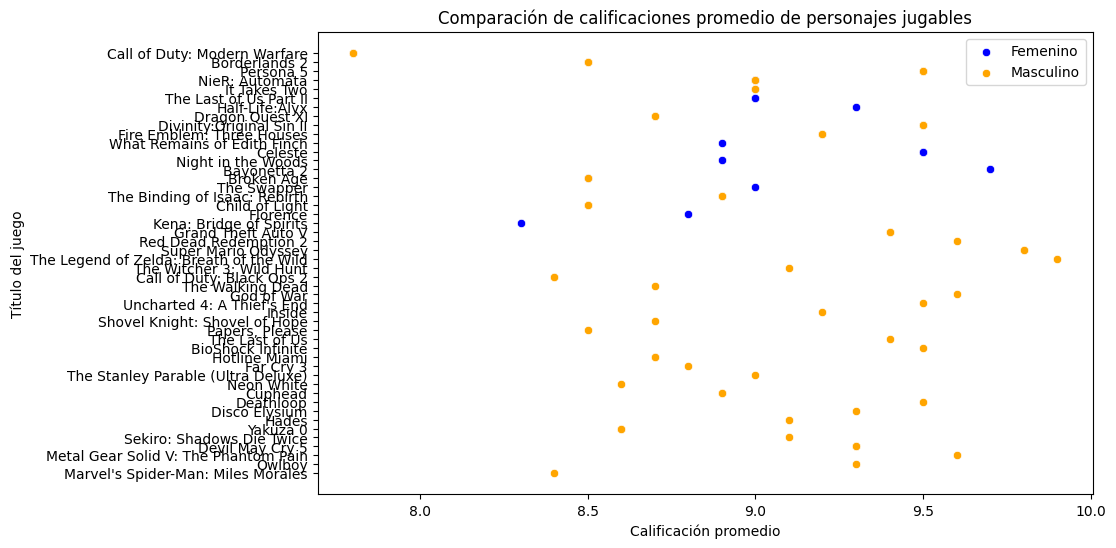

In [173]:
#comparacion segun la valoracion de los personajes jugables

# Filtrar el DataFrame para obtener solo los datos de personajes masculinos jugables
male_playable_df = df[(df['Gender'] == 'Male') & (df['Playable'] == 1)]

# Crear el gráfico de dispersión para personajes femeninos jugables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=female_playable_df, x='Avg_Reviews', y='Title', label='Femenino', color='blue')

# Agregar el gráfico de dispersión para personajes masculinos jugables
sns.scatterplot(data=male_playable_df, x='Avg_Reviews', y='Title', label='Masculino', color='orange')

plt.title('Comparación de calificaciones promedio de personajes jugables')
plt.xlabel('Calificación promedio')
plt.ylabel('Título del juego')
plt.legend()
plt.show()


la puntuacion media de los juegos con pnj jugables masc es mayo, porque son predominantes, no obstante, vemos que algunos con pnj fem también obtienen buenas puntuaciones


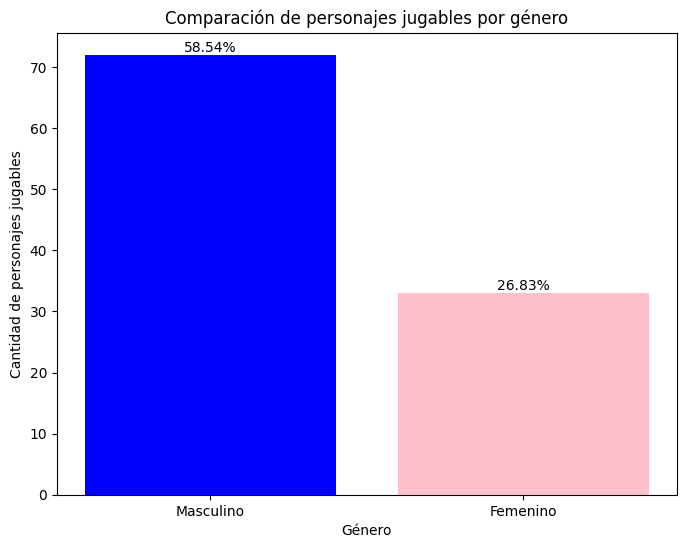

In [174]:
# comparacion de personajes jugables por genero

# Filtrar el DataFrame para obtener solo los datos de personajes jugables
playable_df = df[df['Playable'] == 1]

# Contar el número total de personajes jugables
total_playable = len(playable_df)

# Contar el número de personajes masculinos y femeninos jugables
male_playable_count = (playable_df['Gender'] == 'Male').sum()
female_playable_count = (playable_df['Gender'] == 'Female').sum()

# Calcular los porcentajes
male_percentage = (male_playable_count / total_playable) * 100
female_percentage = (female_playable_count / total_playable) * 100

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(['Masculino', 'Femenino'], [male_playable_count, female_playable_count], color=['blue', 'pink'])

# Agregar los porcentajes a las etiquetas de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height / total_playable:.2%}', ha='center', va='bottom')

plt.title('Comparación de personajes jugables por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personajes jugables')
plt.show()


In [179]:
# Filtrar el DataFrame original para obtener solo los juegos con personajes female jugables
female_playable_df = df[(df['Gender'] == 'Female') & (df['Playable'] == 1)]

# Eliminar duplicados basados en el título del juego
avg_review_female_playable_df = female_playable_df[['Title', 'Avg_Reviews']].drop_duplicates().sort_values(by='Avg_Reviews', ascending=False)

avg_review_female_playable_df



,Title,Avg_Reviews
533,Bayonetta 2,9.7
243,Persona 5,9.5
443,Divinity:Original Sin II,9.5
497,Celeste,9.5
389,Half-Life:Alyx,9.3
471,Fire Emblem: Three Houses,9.2
305,NieR: Automata,9.0
375,It Takes Two,9.0
378,The Last of Us Part II,9.0
570,The Swapper,9.0


In [180]:
# Filtrar el DataFrame original para obtener solo los juegos con personajes female jugables
male_playable_df = df[(df['Gender'] == 'Male') & (df['Playable'] == 1)]

# Eliminar duplicados basados en el título del juego
avg_review_male_playable_df = male_playable_df[['Title', 'Avg_Reviews']].drop_duplicates().sort_values(by='Avg_Reviews', ascending=False)

avg_review_male_playable_df

,Title,Avg_Reviews
95,The Legend of Zelda: Breath of the Wild,9.9
92,Super Mario Odyssey,9.8
75,Red Dead Redemption 2,9.6
560,Metal Gear Solid V: The Phantom Pain,9.6
159,God of War,9.6
206,BioShock Infinite,9.5
239,Persona 5,9.5
165,Uncharted 4: A Thief's End,9.5
296,Deathloop,9.5
442,Divinity:Original Sin II,9.5


Vuelvo a demostrar que la media de puntuacion no tiene en cuenta que el personaje jugable sea fem o masc 